In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def strToInt(x):
    if ',' in x or '$' in x:
        x = x.replace(',', '').replace('$', '')
        return int(x)
    else:
        x = int(x)
        return x

def strtofloat(x):
    if ',' in x:
        x = x.replace(',', '')
        x = float(x)* 1000000
        return x
    else:
        x = float(x)
        return x

In [3]:
tn_movie_budgets = pd.read_csv('data/tn.movie_budgets.csv')
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].map(lambda x: strToInt(x) if type(x) == str else x)
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].map(lambda x: strToInt(x) if type(x) == str else x)
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].map(lambda x: strToInt(x) if type(x) == str else x)
tn_movie_budgets = tn_movie_budgets[tn_movie_budgets['worldwide_gross'] != 0]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5415 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5415 non-null   int64 
 1   release_date       5415 non-null   object
 2   movie              5415 non-null   object
 3   production_budget  5415 non-null   int64 
 4   domestic_gross     5415 non-null   int64 
 5   worldwide_gross    5415 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 296.1+ KB


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864
66,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
41,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157


In [4]:
tn_movie_budgets.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5415.000000,5.415000e+03,5.415000e+03,5.415000e+03
mean,50.227701,3.330801e+07,4.471128e+07,9.768800e+07
std,28.765167,4.248758e+07,6.960989e+07,1.788591e+08
min,1.000000,1.100000e+03,0.000000e+00,2.600000e+01
25%,25.000000,6.000000e+06,3.160708e+06,7.004834e+06
50%,50.000000,1.900000e+07,2.030022e+07,3.333987e+07
75%,75.000000,4.200000e+07,5.578249e+07,1.044590e+08
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


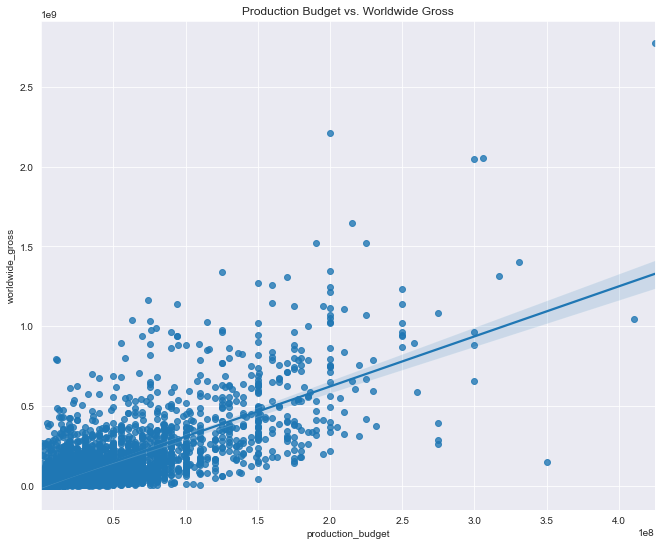

In [5]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(11,9))

x = tn_movie_budgets['production_budget']
y = tn_movie_budgets['worldwide_gross']

ax.set_title('Production Budget vs. Worldwide Gross')
ax.set_xlabel('Production Budget')
ax.set_ylabel("Worldwide Gross")
sns.regplot(x=x, y=y)
plt.show();

# CLEAN FRANKENSTEIN BELOW

In [23]:
#Pulling CSVs
imdb_name_basics = pd.read_csv('data/imdb.name.basics.csv')
# imdb_title_akas = pd.read_csv('data/imdb.title.akas.csv')
imdb_title_basics = pd.read_csv('data/imdb.title.basics.csv')
imdb_title_crew = pd.read_csv('data/imdb.title.crew.csv')
# imdb_title_principals = pd.read_csv('data/imdb.title.principals.csv')
imdb_title_ratings = pd.read_csv('data/imdb.title.ratings.csv')

In [24]:
#Cleans up some of the titles
imdb_title_basics['primary_title'] = imdb_title_basics['primary_title'].map(lambda x: re.sub('[.,:-]', '', x))
tn_movie_budgets['movie'] = tn_movie_budgets['movie'].map(lambda x: re.sub('[.,:-]', '', x))

In [25]:
# Creating Frankenstein
imdb_title_basics.set_index('tconst', inplace=True)
imdb_title_ratings.set_index('tconst', inplace=True)
imdb_title_crew.set_index('tconst', inplace=True)
# imdb_title_principals.set_index('tconst', inplace=True)
imdb_frankenstein = imdb_title_basics.join(imdb_title_ratings, how='left')
imdb_frankenstein = imdb_frankenstein.join(imdb_title_crew, how='left')
# imdb_frankenstein = imdb_frankenstein.join(imdb_title_principals, how='left')
imdb_frankenstein.reset_index(inplace=True)
imdb_frankenstein = imdb_frankenstein.merge(imdb_name_basics, how='left', left_on ='directors', right_on='nconst')
imdb_frankenstein.reset_index(inplace=True)

In [27]:
#Filtering to only include directors
imdb_frankenstein_bride = imdb_frankenstein[imdb_frankenstein['directors'].notna()]
# DROPPING DEAD DIRECTORS
imdb_frankenstein_bride = imdb_frankenstein_bride[imdb_frankenstein_bride['death_year'].isna()]
#DROPPING DUPLICATES IN ORIGINAL_TITLES
imdb_frankenstein_bride = imdb_frankenstein_bride.drop_duplicates(subset=['original_title'])
imdb_frankenstein_bride
# Dropping unnecessary columns
imdb_frankenstein_bride.drop(labels=['index', 'nconst', 'tconst', 'directors', 'writers', \
                                     'birth_year', 'death_year', 'primary_profession', 'known_for_titles'], \
                             axis=1, inplace=True)

In [44]:
# Merging tn_movie_budgets with frankenstein
tn_movie_monster = tn_movie_budgets.merge(imdb_frankenstein_bride, how='left', left_on='movie', right_on='primary_title')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,primary_name
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,Avatar,Abatâ,2011.0,93.0,Horror,6.1,43.0,Atsushi Wada
1,2,"May 20, 2011",Pirates of the Caribbean On Stranger Tides,410600000,241063875,1045663875,Pirates of the Caribbean On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",6.6,447624.0,Rob Marshall
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi",6.0,24451.0,Simon Kinberg
3,4,"May 1, 2015",Avengers Age of Ultron,330600000,459005868,1403013963,Avengers Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi",7.3,665594.0,Joss Whedon
4,5,"Dec 15, 2017",Star Wars Ep VIII The Last Jedi,317000000,620181382,1316721747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5634,76,"May 26, 2006",Cavite,7000,70071,71644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5635,77,"Dec 31, 2004",The Mongol King,7000,900,900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5636,79,"Apr 2, 1999",Following,6000,48482,240495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5637,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
top_100_directors = tn_movie_monster.sort_values('worldwide_gross', ascending=False)[:100][['movie', 'primary_name', 'start_year', 'production_budget', 'worldwide_gross', 'genres']]
top_100_directors['profit'] = top_100_directors['worldwide_gross'] - top_100_directors['production_budget']
top_100_directors['primary_name'].iloc[0] = 'James Cameron'
top_100_directors['primary_name'].iloc[1] = 'James Cameron'
top_100_directors['primary_name'].iloc[2] = 'J.J. Abrams'
top_100_directors['primary_name'].iloc[3] = 'Anthony Russo'
top_100_directors['primary_name'].iloc[9] = 'David Yates'
top_100_directors['primary_name'].iloc[10] = 'Rian Johnson'
top_100_directors['primary_name'].iloc[19] = 'Kyle Balda'
top_100_directors['primary_name'].iloc[21] = 'Peter Jackson'
top_100_directors['primary_name'].iloc[22] = 'Anthony Russo'
top_100_directors['primary_name'].iloc[24] = 'Ryan Fleck'
top_100_directors['primary_name'].iloc[29] = 'Gore Verbinski'
top_100_directors['primary_name'].iloc[32] = 'Steven Spielberg'
top_100_directors['primary_name'].iloc[33] = 'Kyle Balda'
top_100_directors['primary_name'].iloc[34] = 'George Lucas'
top_100_directors['primary_name'].iloc[36] = 'Andrew Stanton'
top_100_directors['primary_name'].iloc[37] = 'Byron Howard'
top_100_directors['primary_name'].iloc[39] = 'Christopher Nolan'
top_100_directors['primary_name'].iloc[41] = 'Pierre Coffin'
top_100_directors['primary_name'].iloc[42] = 'Chris Columbus'
top_100_directors['primary_name'].iloc[44] = 'Gore Verbinski'
top_100_directors['primary_name'].iloc[45] = 'Wolfgang Reitherman'
top_100_directors['primary_name'].iloc[46] = 'David Yates'
top_100_directors['primary_name'].iloc[49] = 'David Yates'
top_100_directors['primary_name'].iloc[50] = 'Andrew Adamson'
top_100_directors['primary_name'].iloc[51] = 'Andrew Stanton'
top_100_directors['primary_name'].iloc[52] = 'David Yates'
top_100_directors['primary_name'].iloc[53] = 'Peter Jackson'
top_100_directors['primary_name'].iloc[54] = 'David Yates'
top_100_directors['primary_name'].iloc[56] = 'Sam Raimi'
top_100_directors['primary_name'].iloc[57] = 'Peter Jackson'
top_100_directors['percentage_profit'] = (top_100_directors['worldwide_gross'] / top_100_directors['production_budget']) * 100
average_director_profits = top_100_directors.groupby('primary_name').mean().sort_values('profit', ascending=False)
average_director_profits_percentage = top_100_directors.groupby('primary_name').mean().sort_values('percentage_profit', ascending=False)

C:\Users\chris\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [92]:
top_100_directors

,movie,primary_name,start_year,production_budget,worldwide_gross,genres,profit,percentage_profit
0,Avatar,James Cameron,2011.0,425000000,2776345279,Horror,2351345279,653.257713
42,Titanic,James Cameron,2012.0,200000000,2208208395,Adventure,2008208395,1104.104198
5,Star Wars Ep VII The Force Awakens,J.J. Abrams,NaN,306000000,2053311220,NaN,1747311220,671.016739
6,Avengers Infinity War,Anthony Russo,2018.0,300000000,2048134200,"Action,Adventure,Sci-Fi",1748134200,682.711400
33,Jurassic World,Colin Trevorrow,2015.0,215000000,1648854864,"Action,Adventure,Sci-Fi",1433854864,766.909239
...,...,...,...,...,...,...,...,...
30,The Amazing SpiderMan,Marc Webb,2012.0,220000000,757890267,"Action,Adventure,Sci-Fi",537890267,344.495576
58,2012,NaN,NaN,200000000,757677748,NaN,557677748,378.838874
127,Shrek Forever After,Mike Mitchell,2010.0,165000000,756244673,"Adventure,Animation,Comedy",591244673,458.330105
54,XMen Days of Future Past,Bryan Singer,2014.0,200000000,747862775,"Action,Adventure,Sci-Fi",547862775,373.931388


<ipython-input-75-73025538b1b8>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, size=25, rotation=15)
<ipython-input-75-73025538b1b8>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y, size=25)
C:\Users\chris\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Directors Average Profit'}, xlabel='primary_name', ylabel='profit'>

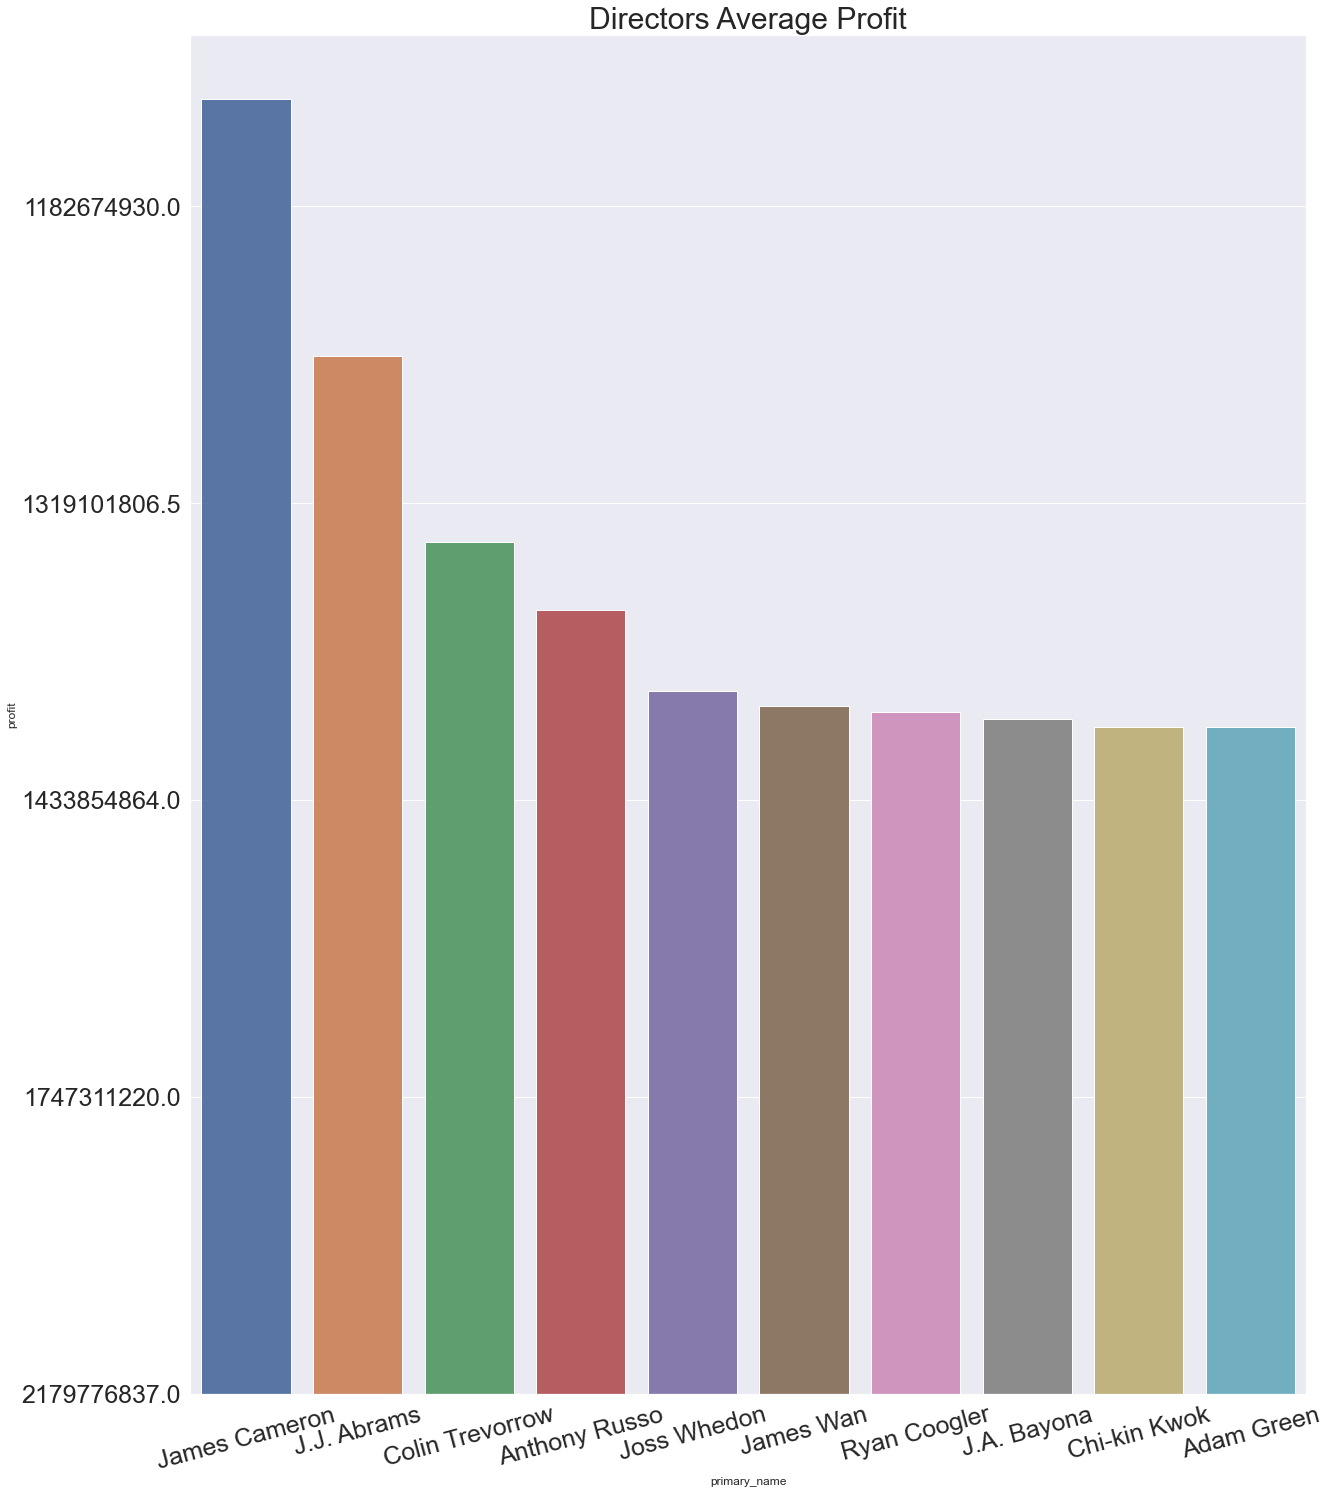

In [75]:
fig, ax = plt.subplots(figsize=(20, 25))

x = average_director_profits.index[:10]
y = average_director_profits['profit'][:10]

ax.set_title('Directors Average Profit', size=30)
plt.xlabel("Colors")
plt.ylabel("Colors")
# ax.set(xlabel="Names", ylabel = "Average Profit")
# ax.set_xlabel(Names', size=25)
ax.set_xticklabels(x, size=25, rotation=15)
ax.set_yticklabels(y, size=25)
# ax.set_ylabel("Average Profit", size=25)
sns.set_color_codes('deep')
sns.barplot(x, y)

<ipython-input-76-c95b85da5ad6>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, size=25, rotation=15)
<ipython-input-76-c95b85da5ad6>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y, size=25)


<AxesSubplot:title={'center':'Directors Average Percentage Profit'}, xlabel='primary_name', ylabel='percentage_profit'>

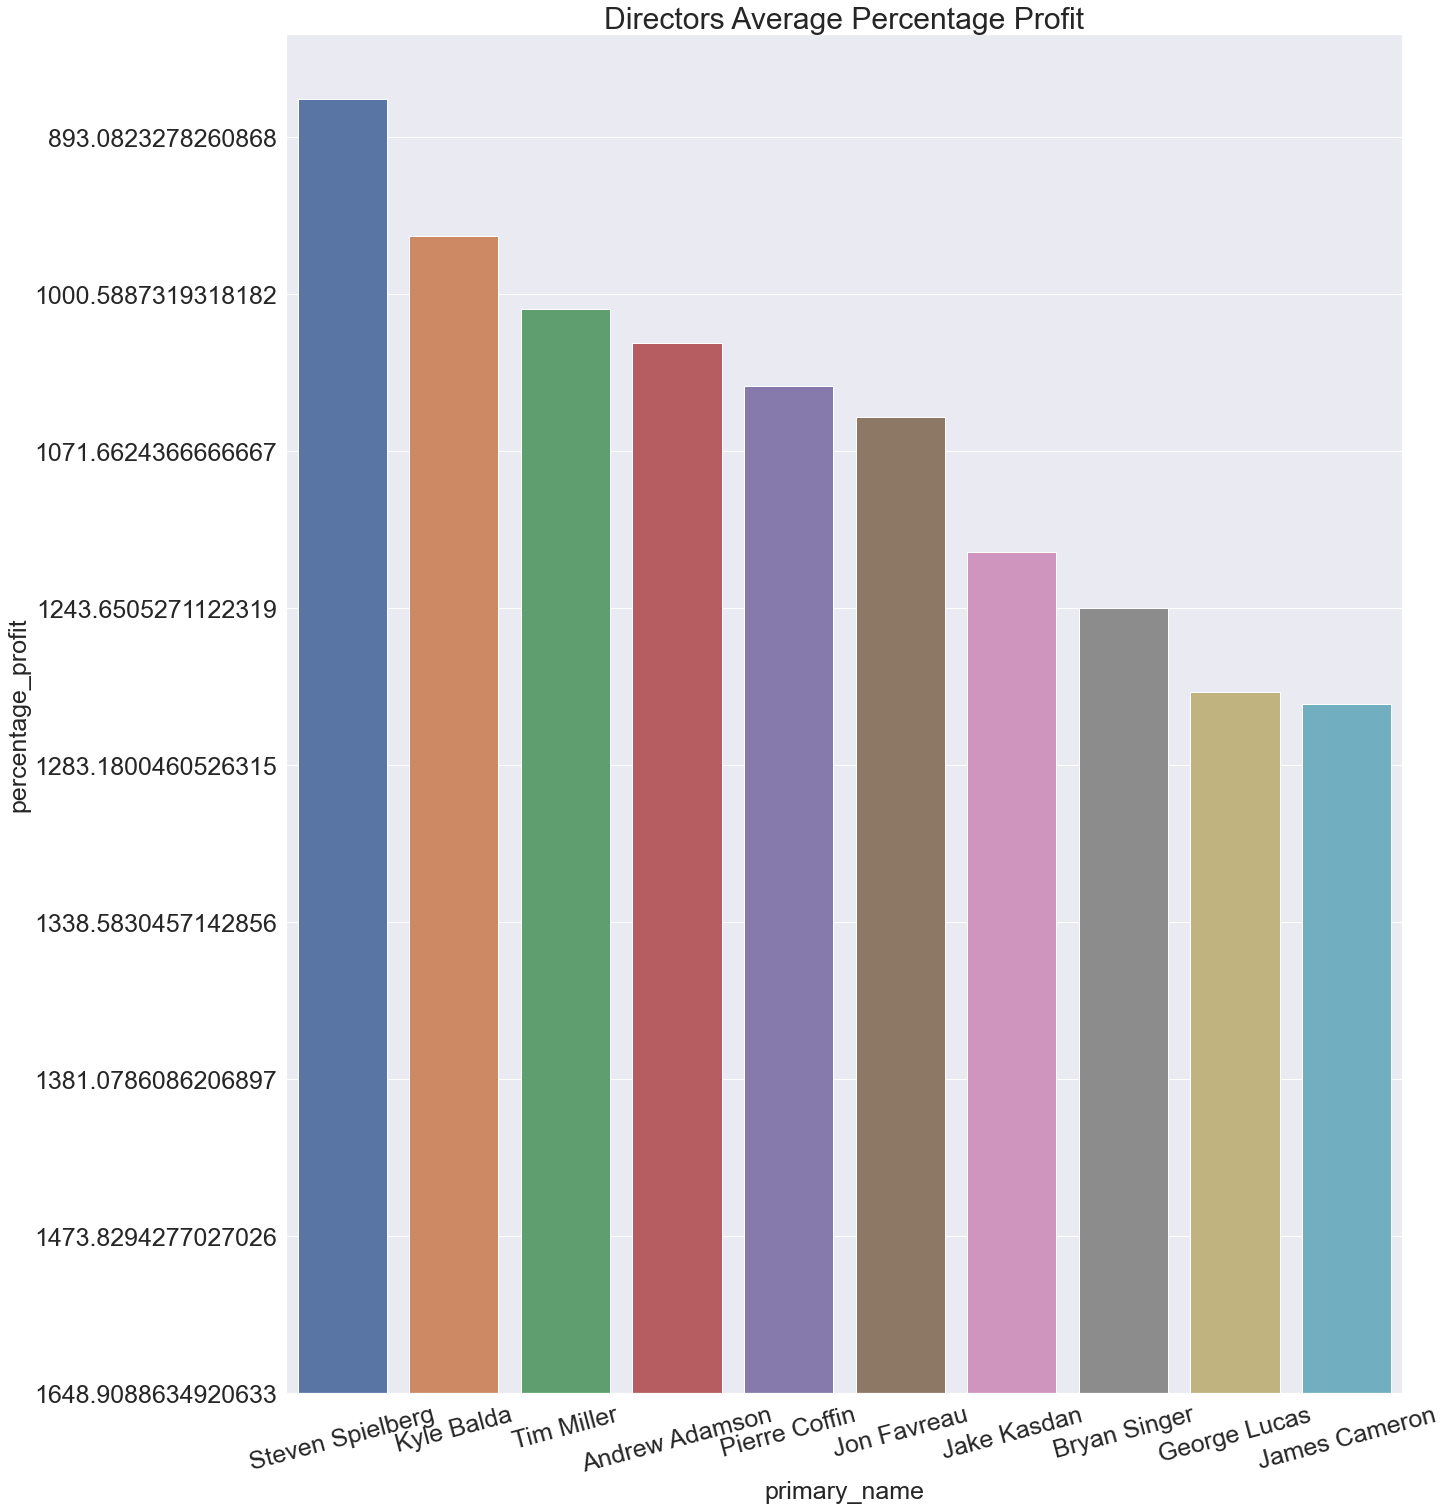

In [76]:
fig, ax = plt.subplots(figsize=(20, 25))

x = average_director_profits_percentage.index[:10]
y = average_director_profits_percentage['percentage_profit'][:10]

ax.set_title('Directors Average Percentage Profit', size=30)
ax.set_xlabel('Names', size=25)
ax.set_xticklabels(x, size=25, rotation=15)
ax.set_yticklabels(y, size=25)
ax.set_ylabel("Average Percentage Profit", size=25)
sns.set_color_codes('deep')
sns.barplot(x=x, y=y)

AttributeError: module 'matplotlib.pyplot' has no attribute 'scale'

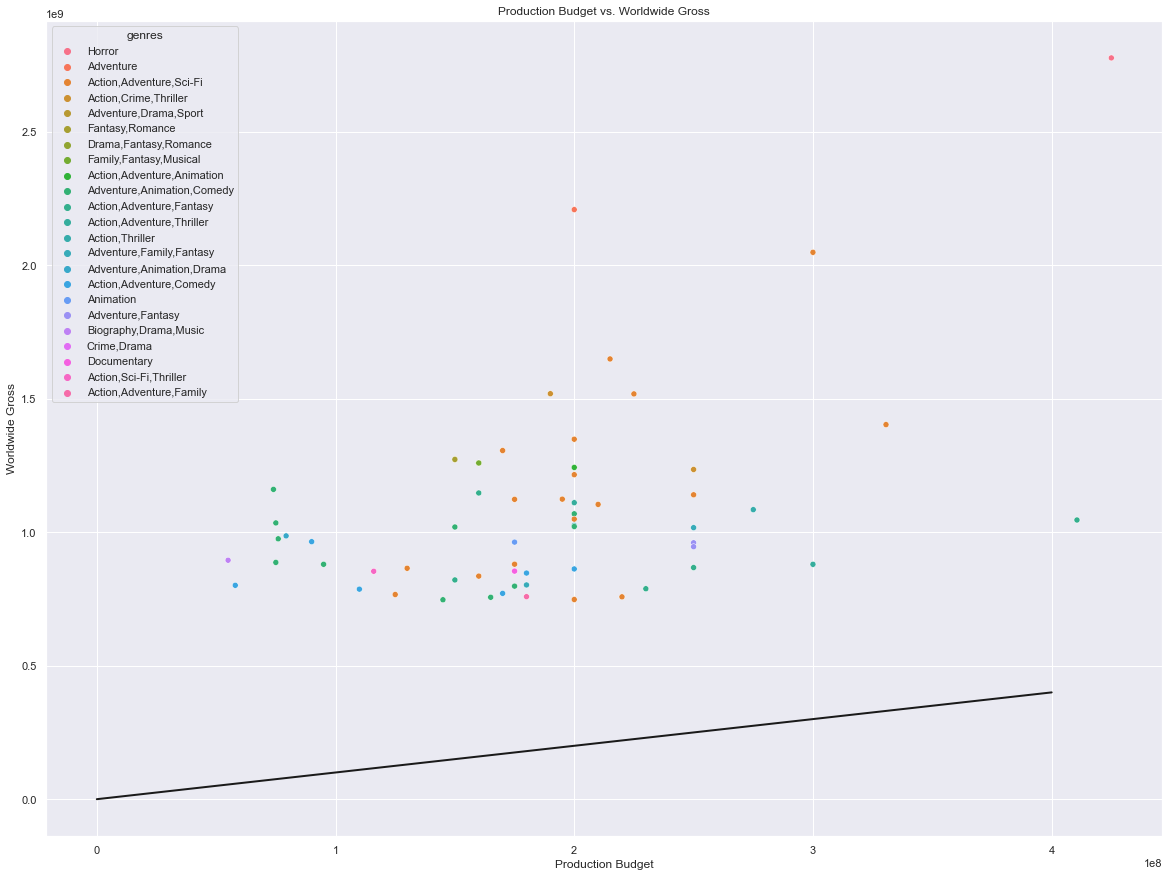

In [91]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(20,15))

x = top_100_directors['production_budget']
y = top_100_directors['worldwide_gross']

ax.set_title('Production Budget vs. Worldwide Gross')
ax.set_xlabel('Production Budget')
ax.set_ylabel("Worldwide Gross")
sns.scatterplot(x=x, y=y, hue= top_100_directors['genres'])
plt.plot([0, 400000000], [0,400000000], 'k-', lw=2)
plt.show();